# Onboarding Deep Draw project
Le Wagon batch #1002

🎯 Get familiar with <a href="https://github.com/googlecreativelab/quickdraw-dataset" target="_blank" rel="nofollow">The Quick Draw! dataset</a> from Google Creative Lab.

The Quick Draw Dataset is a collection of 50 million drawings across 345 categories, contributed by players of <a href="https://quickdraw.withgoogle.com/" target="_blank" rel="nofollow">the game Quick, Draw!</a>. The drawings were captured as timestamped vectors, tagged with metadata including what the player was asked to draw and in which country the player was located. You can browse the recognized drawings on <a href="https://quickdraw.withgoogle.com/data" target="_blank" rel="nofollow">here</a>.

## A preprocessed dataset

### Simplified ndjson format

👇 Load the simplified cat drawings in `ndjson` format.

In [2]:
with open('./cat.ndjson', 'r') as cats_ndjson_file :
    cats_simp_ndjson_lines = cats_ndjson_file.readlines()

👇 Extract the first cat drawing in a python readable format.

In [3]:
cat1 = json.loads(cats_simp_ndjson_lines[0])

👇 `cat1` looks like this

In [4]:
cat1 == {"word":"cat",
 "countrycode":"VE",
 "timestamp":"2017-03-02 23:25:10.07453 UTC",
 "recognized":True,
 "key_id":"5201136883597312",
 "drawing":[
   [
     [130,113,99,109,76,64,55,48,48,51,59,86,133,154,170,203,214,217,215,208,186,176,162,157,132],
     [72,40,27,79,82,88,100,120,134,152,165,184,189,186,179,152,131,114,100,89,76,0,31,65,70]
   ],[
     [76,28,7],
     [136,128,128]
   ],[
     [76,23,0],
     [160,164,175]
   ],[
     [87,52,37],
     [175,191,204]
   ],[
     [174,220,246,251],
     [134,132,136,139]
   ],[
     [175,255],
     [147,168]
   ],[
     [171,208,215],
     [164,198,210]
   ],[
     [130,110,108,111,130,139,139,119],
     [129,134,137,144,148,144,136,130]
   ],[
     [107,106],
     [96,113]
   ]
 ]
}

True

Three pieces of information are interesting :
- `['word']` : name of the drawing category, 
- `['drawing']` : list of strokes, 
- `['key_id']` : unique id of the drawing.

We can get rid of the other keys.

In [5]:
unwanted = set(cat1) - set(['word', 'key_id', 'drawing'])
for unwanted_key in unwanted: del cat1[unwanted_key]

In [6]:
for key in ['word', 'key_id', 'drawing']:
    print(f"cat1['{key}'] = {cat1[key]}", end='\n\n')

cat1['word'] = cat

cat1['key_id'] = 5201136883597312

cat1['drawing'] = [[[130, 113, 99, 109, 76, 64, 55, 48, 48, 51, 59, 86, 133, 154, 170, 203, 214, 217, 215, 208, 186, 176, 162, 157, 132], [72, 40, 27, 79, 82, 88, 100, 120, 134, 152, 165, 184, 189, 186, 179, 152, 131, 114, 100, 89, 76, 0, 31, 65, 70]], [[76, 28, 7], [136, 128, 128]], [[76, 23, 0], [160, 164, 175]], [[87, 52, 37], [175, 191, 204]], [[174, 220, 246, 251], [134, 132, 136, 139]], [[175, 255], [147, 168]], [[171, 208, 215], [164, 198, 210]], [[130, 110, 108, 111, 130, 139, 139, 119], [129, 134, 137, 144, 148, 144, 136, 130]], [[107, 106], [96, 113]]]



👇 In this simplified version, the first cat is made of **9 strokes**. The **maximum length of stokes is 25** and there are a **total of 53 points**.

In [7]:
cat1_strokes = cat1['drawing']
cat1_n_strokes = len(cat1_strokes)
cat1_stroke_lengths = [len(stroke[0]) for stroke in cat1_strokes]
cat1_total_points = sum(cat1_stroke_lengths)

print(f"Cat1 number of strokes: {cat1_n_strokes}")
print(f"Cat1 stroke lengths: {cat1_stroke_lengths}")
print(f"Cat1 total points: {cat1_total_points}")

Cat1 number of strokes: 9
Cat1 stroke lengths: [25, 3, 3, 3, 4, 2, 3, 8, 2]
Cat1 total points: 53


👇 Google has preprocessed the data to position and scale it. We can easily visualize the drawings on a graph. **The drawing is a 256x256 image**. For some reason, **the drawings are aligned to the top-left corner** so that the y axis seems to be reversed on the graph.

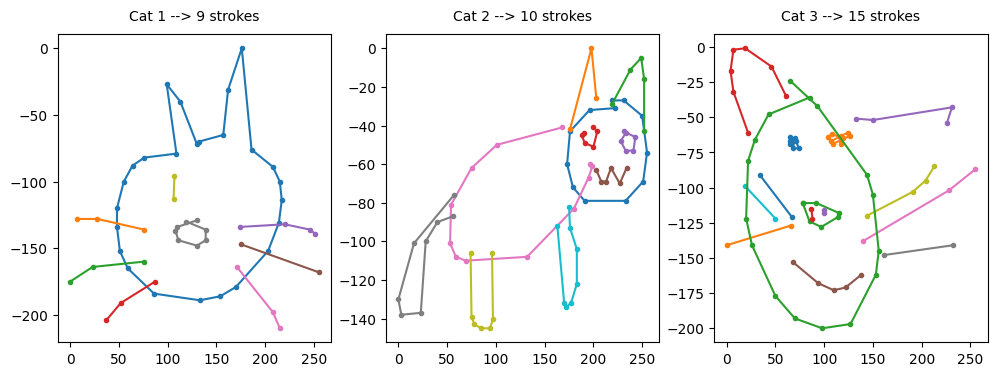

In [8]:
import matplotlib.pyplot as plt

def draw_three(ndjson_lines):
    fig, axs = plt.subplots(1, 3, figsize=(12,4))
    for k in range(0,3):
        data = json.loads(ndjson_lines[k])
        strokes = data['drawing']
        category = data['word']
        for i, stroke in enumerate(strokes): 
            x = list(stroke[0])
            y = list(stroke[1])
            # Uncomment the next line to reverse the y-axis
            y = list(map(lambda n : - n, stroke[1]))
            axs[k].plot(x,y, '.-')
            axs[k].set_title(f"{category.title()} {k+1} --> {len(strokes)} strokes", fontsize=10, pad=10)

draw_three(cats_simp_ndjson_lines)

### Raw ndjson format

The **raw ndjson** dataset works in a similar way.

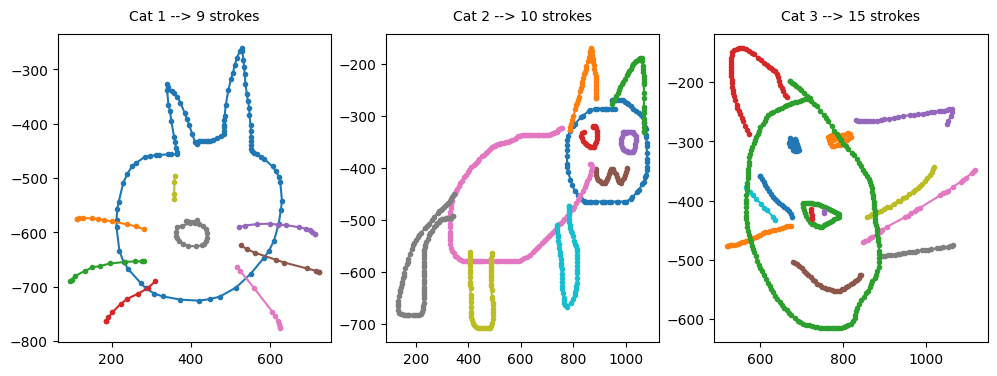

In [9]:
with open('./full_raw_cat.ndjson', 'r') as cats_ndjson_file :
    cats_raw_ndjson_lines = cats_ndjson_file.readlines()

draw_three(cats_raw_ndjson_lines)

There are the same number of strokes but **each stroke contains more points**. The drawing is smoother.

The simplification process was:

- Align the drawing to the top-left corner, to have minimum values of 0.
- Uniformly scale the drawing, to have a maximum value of 255.
- Resample all strokes with a 1 pixel spacing.
- Simplify all strokes using the <a href="https://en.wikipedia.org/wiki/Ramer%E2%80%93Douglas%E2%80%93Peucker_algorithm" target="_blank" rel="nofollow">Ramer–Douglas–Peucker</a> algorithm with an epsilon value of 2.0.

In [10]:
cat1 = json.loads(cats_raw_ndjson_lines[0])
cat1_strokes = cat1['drawing']
cat1_n_strokes = len(cat1_strokes)
cat1_stroke_lengths = [len(stroke[0]) for stroke in cat1_strokes]
cat1_total_points = sum(cat1_stroke_lengths)

print(f"Cat1 number of strokes: {cat1_n_strokes}")
print(f"Cat1 stroke lengths: {cat1_stroke_lengths}")
print(f"Cat1 total points: {cat1_total_points}")

Cat1 number of strokes: 9
Cat1 stroke lengths: [101, 11, 11, 9, 12, 9, 9, 24, 4]
Cat1 total points: 190


### Numpy bitmaps format

All the simplified drawings have been rendered into a **28x28 grayscale bitmap** in numpy `.npy` format. The files can be loaded with `np.load()`. These images were generated from the simplified data, but are aligned to the center of the drawing's bounding box rather than the top-left corner.

👇 Load the numpy bitmaps cat drawings in `.npy` format.

In [11]:
import numpy as np
cats = np.load('./npy/full_numpy_bitmap_cat.npy')

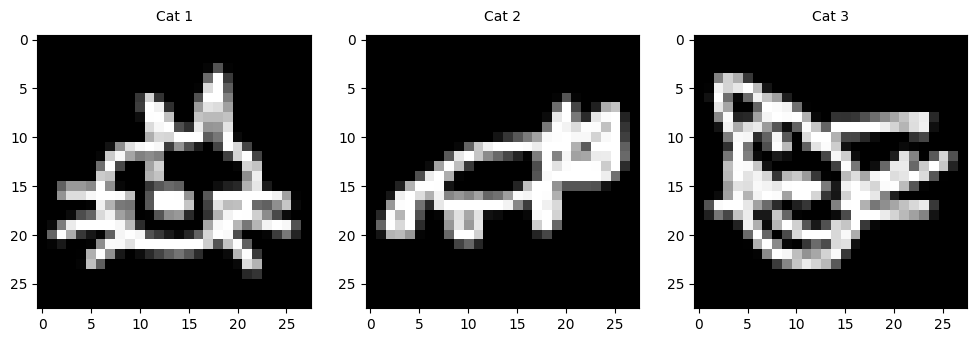

In [12]:

fig, axs = plt.subplots(1, 3, figsize=(12,4))
for k in range(0,3):
    image = cats[k].reshape(28,28)
    axs[k].imshow(image, cmap=plt.cm.gray)
    axs[k].set_title(f"Cat {k+1}", fontsize=10, pad=10)

👇 Here is the function used to transform from simplified **ndjson** format to **numpy bitmap** format.

In [13]:
import numpy as np
import cairocffi as cairo

def vector_to_raster(vector_images, side=28, line_diameter=16, padding=16, bg_color=(0,0,0), fg_color=(1,1,1)):
    """
    padding and line_diameter are relative to the original 256x256 image.
    """
    
    original_side = 256.
    
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, side, side)
    ctx = cairo.Context(surface)
    ctx.set_antialias(cairo.ANTIALIAS_BEST)
    ctx.set_line_cap(cairo.LINE_CAP_ROUND)
    ctx.set_line_join(cairo.LINE_JOIN_ROUND)
    ctx.set_line_width(line_diameter)

    # scale to match the new size
    # add padding at the edges for the line_diameter
    # and add additional padding to account for antialiasing
    total_padding = padding * 2. + line_diameter
    new_scale = float(side) / float(original_side + total_padding)
    ctx.scale(new_scale, new_scale)
    ctx.translate(total_padding / 2., total_padding / 2.)

    raster_images = []
    for vector_image in vector_images:
        # clear background
        ctx.set_source_rgb(*bg_color)
        ctx.paint()
        
        bbox = np.hstack(vector_image).max(axis=1)
        offset = ((original_side, original_side) - bbox) / 2.
        offset = offset.reshape(-1,1)
        centered = [stroke + offset for stroke in vector_image]

        # draw strokes, this is the most cpu-intensive part
        ctx.set_source_rgb(*fg_color)        
        for xv, yv in centered:
            ctx.move_to(xv[0], yv[0])
            for x, y in zip(xv, yv):
                ctx.line_to(x, y)
            ctx.stroke()

        data = surface.get_data()
        raster_image = np.copy(np.asarray(data)[::4])
        raster_images.append(raster_image)
    
    return raster_images

👇 You can check that this function returns indeed the same images. Feel free to play with the parameter side to visualize a more detailed image.

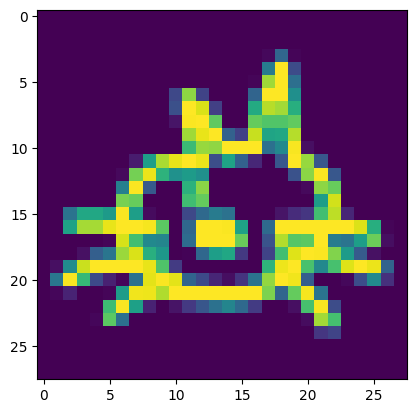

In [14]:
cat1 = json.loads(cats_simp_ndjson_lines[0])
cat1_strokes = cat1['drawing']
side = 28
image = np.array(vector_to_raster([cat1_strokes], side=side)).reshape(side,-1)
plt.imshow(image);

## Manipulating the dataset

### The Polyline format

👇 The ndjson lines store the drawing in a very specific format that we'll call the **QuickDraw raw format**. This format is a list of sub_lists where each sub_list represent a stoke and contains two sub_sub_lists of x and y coordinates. **Note that X and Y coordinates are separated in two different lists.**

In [15]:
print(f"Number of strokes in Cat1: {len(cat1['drawing'])}")

Number of strokes in Cat1: 9


In [16]:
print(f"Example - 2nd stroke of Cat1: {cat1['drawing'][1]}")

Example - 2nd stroke of Cat1: [[76, 28, 7], [136, 128, 128]]


👇 We can convert this **QuickDraw raw format** to a new format called **Polyline format** which is basically a succession of [x, y] points grouped by strokes. **Note that X and Y are now regrouped**.

In [17]:
def raw_to_lines(raw):
    """Convert QuickDraw raw format into polyline format."""
    result = []
    N = len(raw)
    for i in range(N):
        line = []
        rawline = raw[i]
        M = len(rawline[0])
        #if M <= 2:
            #continue
        for j in range(M):
            line.append([rawline[0][j], rawline[1][j]]) 
        result.append(line)
    return result

cat1_lines = raw_to_lines(cat1['drawing'])
cat1_lines

[[[130, 72],
  [113, 40],
  [99, 27],
  [109, 79],
  [76, 82],
  [64, 88],
  [55, 100],
  [48, 120],
  [48, 134],
  [51, 152],
  [59, 165],
  [86, 184],
  [133, 189],
  [154, 186],
  [170, 179],
  [203, 152],
  [214, 131],
  [217, 114],
  [215, 100],
  [208, 89],
  [186, 76],
  [176, 0],
  [162, 31],
  [157, 65],
  [132, 70]],
 [[76, 136], [28, 128], [7, 128]],
 [[76, 160], [23, 164], [0, 175]],
 [[87, 175], [52, 191], [37, 204]],
 [[174, 134], [220, 132], [246, 136], [251, 139]],
 [[175, 147], [255, 168]],
 [[171, 164], [208, 198], [215, 210]],
 [[130, 129],
  [110, 134],
  [108, 137],
  [111, 144],
  [130, 148],
  [139, 144],
  [139, 136],
  [119, 130]],
 [[107, 96], [106, 113]]]

### The Stroke-3 and Stroke-5 formats

Sketches can be encoded as a sequence of strokes. **Stroke-3** and **Stroke-5** are
different stroke encodings. 
- **Stroke-3** uses 3-tuples, consisting of **x-offset, y-offset, and a binary variable** p which is 1 if the pen is lifted between this position and the next, and 0 otherwise. 
- **Stroke-5** consists of **x-offset, y-offset, and p_1, p_2, p_3, a binary one-hot vector** of 3 possible pen states: pen down, pen up, end of sketch.

👇 One can easily compute the Stroke-3 format from the Polyline format.

In [18]:
def lines_to_strokes(lines, delta=True):
    """Convert polyline format to stroke-3 format. x-offset, y-offset is optional."""
    eos = 0
    strokes = [[0, 0, 0]]
    for line in lines:
        linelen = len(line)
        for i in range(linelen):
            eos = 0 if i < linelen - 1 else 1
            strokes.append([line[i][0], line[i][1], eos])
    strokes = np.array(strokes)
    if delta :
        strokes[1:, 0:2] -= strokes[:-1, 0:2] # Compute deltas
    return strokes[1:, :] # Trunc the first point

cat1_strokes_3 = lines_to_strokes(cat1_lines, delta=True)
cat1_strokes_3

array([[130,  72,   0],
       [-17, -32,   0],
       [-14, -13,   0],
       [ 10,  52,   0],
       [-33,   3,   0],
       [-12,   6,   0],
       [ -9,  12,   0],
       [ -7,  20,   0],
       [  0,  14,   0],
       [  3,  18,   0],
       [  8,  13,   0],
       [ 27,  19,   0],
       [ 47,   5,   0],
       [ 21,  -3,   0],
       [ 16,  -7,   0],
       [ 33, -27,   0],
       [ 11, -21,   0],
       [  3, -17,   0],
       [ -2, -14,   0],
       [ -7, -11,   0],
       [-22, -13,   0],
       [-10, -76,   0],
       [-14,  31,   0],
       [ -5,  34,   0],
       [-25,   5,   1],
       [-56,  66,   0],
       [-48,  -8,   0],
       [-21,   0,   1],
       [ 69,  32,   0],
       [-53,   4,   0],
       [-23,  11,   1],
       [ 87,   0,   0],
       [-35,  16,   0],
       [-15,  13,   1],
       [137, -70,   0],
       [ 46,  -2,   0],
       [ 26,   4,   0],
       [  5,   3,   1],
       [-76,   8,   0],
       [ 80,  21,   1],
       [-84,  -4,   0],
       [ 37,  34

In [19]:
len(cat1_strokes_3)

53

👇 From Stroke-3 format,  we can go to Stroke-5 format. The max length is the maximum length of all your drawings. Stroke-5 allows to have **a [max_len, 5] tensor with fixed dimensions for all drawings**.

In [20]:
def to_big_strokes(stroke, max_len=250):
    """Converts from stroke-3 to stroke-5 format and pads to given length."""
    # (But does not insert special start token).

    result = np.zeros((max_len, 5), dtype=float)
    l = len(stroke)
    assert l <= max_len
    result[0:l, 0:2] = stroke[:, 0:2]
    result[0:l, 3] = stroke[:, 2]
    result[0:l, 2] = 1 - result[0:l, 3]
    result[l:, 4] = 1
    return result

cat1_strokes_5 = to_big_strokes(cat1_strokes_3)
cat1_strokes_5

array([[130.,  72.,   1.,   0.,   0.],
       [-17., -32.,   1.,   0.,   0.],
       [-14., -13.,   1.,   0.,   0.],
       ...,
       [  0.,   0.,   0.,   0.,   1.],
       [  0.,   0.,   0.,   0.,   1.],
       [  0.,   0.,   0.,   0.,   1.]])

In [21]:
len(cat1_strokes_5)

250

👇 We can **reverse the process** and go from Stroke-5 to Stroke-3 format.

In [22]:
def to_normal_strokes(big_stroke):
    """Convert from stroke-5 format (from sketch-rnn paper) back to stroke-3."""
    l = 0
    for i in range(len(big_stroke)):
        if big_stroke[i, 4] > 0:
            l = i
            break
    if l == 0:
        l = len(big_stroke)
    result = np.zeros((l, 3))
    result[:, 0:2] = big_stroke[0:l, 0:2]
    result[:, 2] = big_stroke[0:l, 3]
    return result

In [23]:
cat1_reverse_stroke3 = to_normal_strokes(cat1_strokes_5)
np.allclose(cat1_strokes_3, cat1_reverse_stroke3)

True

### Draw a vector image from Stroke-3 format

👇 Here is a little function that displays vector images from Stroke-3 format and saves them to `.svg`

In [24]:
import os
import svgwrite
from IPython.display import SVG, display

def draw_strokes(data, factor=0.045, save=False, svg_filename = './svg/sample.svg', bounds=None):
    if save :
        if not os.path.exists(os.path.dirname(svg_filename)):
            os.makedirs(os.path.dirname(svg_filename))
    if bounds != None :
        min_x, max_x, min_y, max_y = bounds[0], bounds[1], bounds[2], bounds[3]
    else :    
        min_x, max_x, min_y, max_y = get_bounds(data, factor)
    dims = (50 + max_x - min_x, 50 + max_y - min_y)
    dwg = svgwrite.Drawing(svg_filename, size=dims)
    dwg.add(dwg.rect(insert=(0, 0), size=dims,fill='white'))
    lift_pen = 1
    abs_x = 25 - min_x 
    abs_y = 25 - min_y
    p = "M%s,%s " % (abs_x, abs_y)
    command = "m"
    for i in range(len(data)):
        if (lift_pen == 1):
            command = "m"
        elif (command != "l"):
            command = "l"
        else:
            command = ""
        x = float(data[i,0])/factor
        y = float(data[i,1])/factor
        lift_pen = data[i, 2]
        p += command+str(x)+","+str(y)+" "
    the_color = "black"
    stroke_width = 1
    dwg.add(dwg.path(p).stroke(the_color,stroke_width).fill("none"))
    if save:
        dwg.save()
    #display(SVG(dwg.tostring()))
    return dwg

def get_bounds(data, factor=1):
    """Return bounds of data."""
    min_x = 0
    max_x = 0
    min_y = 0
    max_y = 0

    abs_x = 0
    abs_y = 0
    for i in range(len(data)):
        x = float(data[i, 0]) / factor
        y = float(data[i, 1]) / factor
        abs_x += x
        abs_y += y
        min_x = min(min_x, abs_x)
        min_y = min(min_y, abs_y)
        max_x = max(max_x, abs_x)
        max_y = max(max_y, abs_y)
    return (min_x, max_x, min_y, max_y)

👇 For example, you start from a raw file, convert to Polyline and then to Stroke-3 to finally draw the sketch.

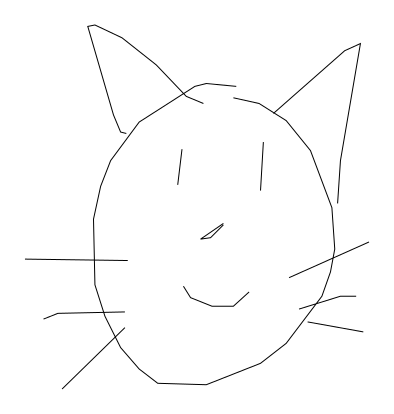

In [25]:
cat4 = json.loads(cats_simp_ndjson_lines[3])
cat4_lines = raw_to_lines(cat4['drawing'])
cat4_strokes_3 = lines_to_strokes(cat4_lines, delta=True)
draw_strokes(cat4_strokes_3, factor=0.7, save=True, svg_filename = './svg/cat1.svg')

👇 You understand now that in fact the Stroke-3 format gives us information on how the drawing was created and in what which order. You can thus create an animated `gif` out of it.

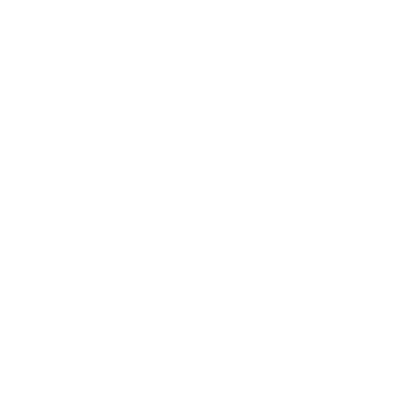

In [26]:
from PIL import Image, ImageDraw, Image
from cairosvg import svg2png
import imageio as iio
from IPython.display import Image

def draw_gif(data, factor = 0.7, gif_filename = './gif/sample.gif', png_filename = './png/sample.png'):
    
    if not os.path.exists(os.path.dirname(gif_filename)):
        os.makedirs(os.path.dirname(gif_filename))
    if not os.path.exists(os.path.dirname(png_filename)):
        os.makedirs(os.path.dirname(png_filename))
     
    files_png=[]
    files_svg=[]
    bounds = get_bounds(data, factor=factor)
    for i in range(len(data)+1):
        draw_strokes(data[0:i], factor=factor, save=True, svg_filename = f'./svg/test{i}.svg', bounds=bounds)
        svg2png(url=f'./svg/test{i}.svg', write_to=f'./png/test{i}.png')
        files_png.append(f'./png/test{i}.png')
        files_svg.append(f'./svg/test{i}.svg')

    with iio.get_writer(gif_filename, mode='I', loop=0, fps=12) as writer:
        for filename in files_png:
            image = iio.v3.imread(filename)
            writer.append_data(image)
    for filename in set(files_png):
        os.remove(filename)
    for filename in set(files_svg):
        os.remove(filename)
    
    display(Image(data=open(gif_filename,'rb').read(), format='png'))

draw_gif(cat4_strokes_3)

### How to simplify a raw drawing

Going from a raw QuickDraw `.ndjson` drawing to a simplified `.ndjson` oject can be done in 7 steps :
- **Step 1** : Convert the QuickDraw raw format to Polyline format and then from Polyline to simili Stroke-3 without delta.
- **Step 2** : Resample all strokes with a 1 pixel spacing and c
- **Step 3** : Align the drawing to the top-left corner, to have minimum values of 0.
- **Step 4** : Uniformly scale the drawing, to have a maximum value of 255.
- **Step 5** : Compute real Stroke-3 format with delta
- **Step 6** : Convert back to Polyline format and simplify using the <a href="https://en.wikipedia.org/wiki/Ramer%E2%80%93Douglas%E2%80%93Peucker_algorithm" target="_blank" rel="nofollow">Ramer–Douglas–Peucker</a> algorithm with an epsilon value of 2.0.
- **Step 7** : Convert once again back to Stroke-3 format and plot the result





👇 But first we will need three more utile functions ...

In [27]:
def strokes_to_lines(strokes):
    """Convert stroke-3 format to polyline format."""
    x = 0
    y = 0
    lines = []
    line = []
    for i in range(len(strokes)):
        if strokes[i, 2] == 1:
            x += float(strokes[i, 0])
            y += float(strokes[i, 1])
            line.append([x, y])
            lines.append(line)
            line = []
        else:
            x += float(strokes[i, 0])
            y += float(strokes[i, 1])
            line.append([x, y])
    return lines

In [28]:
def clean_strokes(sample_strokes, factor=100):
    """Cut irrelevant end points, scale to pixel space and store as integer."""
    # Useful function for exporting data to .json format.
    copy_stroke = []
    added_final = False
    for j in range(len(sample_strokes)):
        finish_flag = int(sample_strokes[j][4])
        if finish_flag == 0:
            copy_stroke.append([
              int(round(sample_strokes[j][0] * factor)),
              int(round(sample_strokes[j][1] * factor)),
              int(sample_strokes[j][2]),
              int(sample_strokes[j][3]), finish_flag
            ])
        else:
            copy_stroke.append([0, 0, 0, 0, 1])
            added_final = True
            break
    if not added_final:
        copy_stroke.append([0, 0, 0, 0, 1])
    return copy_stroke

In [29]:
def stroke_to_quickdraw(orig_data, max_dim_size=5.0):
    ''' convert back to list of points format, up to 255 dimensions '''
    data = np.copy(orig_data).astype(float)
    data[:, 0:2] *= (255.0/max_dim_size) # to prevent overflow
    data = np.round(data).astype('int')
    abs_x = 0
    abs_y = 0
    result = []
    num = np.sum(data[:,2])
    for k in range(num):
        result.append([[],[]])
    counter=0
    for i in np.arange(0, len(data)):
        dx = data[i,0]
        dy = data[i,1]
        abs_x += dx
        abs_y += dy
        abs_x = np.maximum(abs_x, 0)
        abs_x = np.minimum(abs_x, 255)
        abs_y = np.maximum(abs_y, 0)
        abs_y = np.minimum(abs_y, 255) 
        lift_pen = data[i, 2]
        result[counter][0].append(abs_x)
        result[counter][1].append(abs_y)
        if (lift_pen == 1):
            counter += 1
    return result

👇 Now we can go through each step ...

In [30]:
from rdp import rdp
import random

n_cat = random.randint(0,100)

# Load data
randcat_raw = json.loads(cats_raw_ndjson_lines[n_cat])

# Step 1
randcat_raw_lines = raw_to_lines(randcat_raw['drawing'])
randcat_raw_strokes_3 = lines_to_strokes(randcat_raw_lines, delta=False)
randcat_raw_strokes_3_before = lines_to_strokes(randcat_raw_lines, delta=True)

# Step 2
randcat_raw_strokes_3 = to_big_strokes(randcat_raw_strokes_3, max_len=1000) ##??
randcat_raw_strokes_3 = np.array(clean_strokes(randcat_raw_strokes_3, factor=1)) ##??
randcat_raw_strokes_3 = to_normal_strokes(randcat_raw_strokes_3) ##??

# Steps 3&4
lower = np.min(randcat_raw_strokes_3[:, 0:2], axis=0)
upper = np.max(randcat_raw_strokes_3[:, 0:2], axis=0)
scale = upper - lower
scale[scale == 0] = 1
randcat_raw_strokes_3[:, 0:2] = (randcat_raw_strokes_3[:, 0:2] - lower)*255 / scale

# Step 5
randcat_raw_strokes_3[1:, 0:2] -= randcat_raw_strokes_3[:-1, 0:2]

# Step 6
lines = strokes_to_lines(randcat_raw_strokes_3)
randcat_simp_lines = []
N = len(lines)
for i in range(N):
    line = rdp(lines[i], epsilon=2) 
    randcat_simp_lines.append(line) 

# Step 7
randcat_simp_strokes_3 = lines_to_strokes(randcat_simp_lines, delta=True)
randcat_simp_strokes_3 = np.round(randcat_simp_strokes_3).astype(float) ##??

In [31]:
print(f'We started there : strokes of length {len(randcat_raw_strokes_3_before)}')
print(f'We arrived there : strokes of length {len(randcat_simp_strokes_3)}')

We started there : strokes of length 118
We arrived there : strokes of length 40


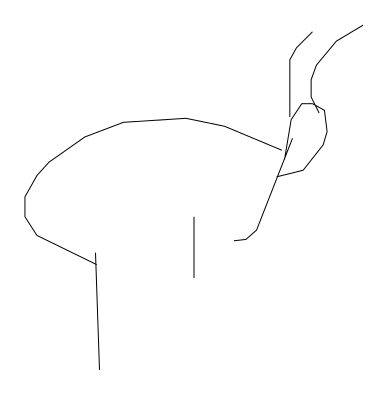

In [32]:
draw_strokes(randcat_simp_strokes_3, factor=0.75, save=False, svg_filename = './svg/cat1.svg')

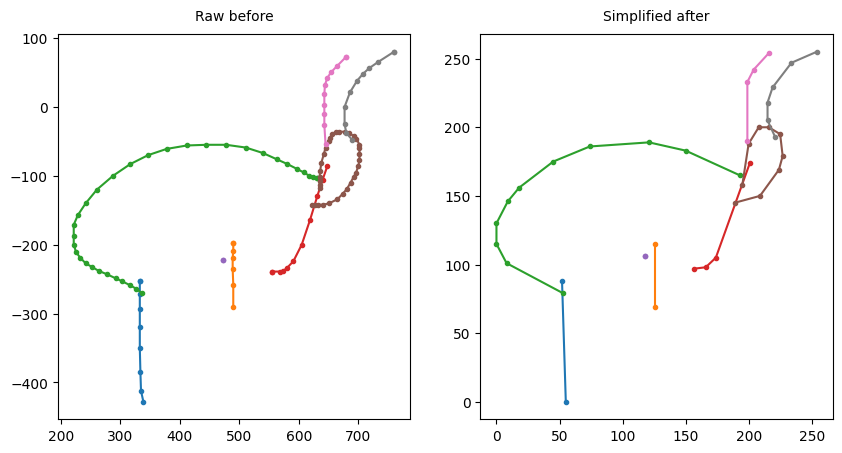

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

strokes = randcat_raw['drawing']
for i, stroke in enumerate(strokes): 
    x = list(stroke[0])
    y = list(stroke[1])
    # Uncomment the next line to reverse the y-axis
    y = list(map(lambda n : 255 - n, stroke[1]))
    axs[0].plot(x,y, '.-')
    #axs[0].axis('off')
    axs[0].set_title("Raw before", fontsize=10, pad=10)


strokes = stroke_to_quickdraw(randcat_simp_strokes_3, max_dim_size=255)
for i, stroke in enumerate(strokes): 
    x = list(stroke[0])
    y = list(stroke[1])
    # Uncomment the next line to reverse the y-axis
    y = list(map(lambda n : 255 - n, stroke[1]))
    axs[1].plot(x, y, '.-')
    #axs[1].axis('off')
    axs[1].set_title("Simplified after", fontsize=10, pad=10)

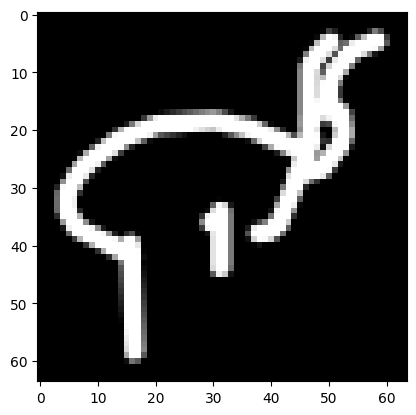

In [34]:
strokes = stroke_to_quickdraw(randcat_simp_strokes_3, max_dim_size=255)
image = np.array(vector_to_raster([strokes], side=64)).reshape(64,-1)
plt.imshow(image, cmap=plt.cm.gray);

### The .npz files

Finally, Google also provides compressed `.npz` files. They contain the Strokes-3 format of all the drawings that have already been simplified via the <a href="https://en.wikipedia.org/wiki/Ramer%E2%80%93Douglas%E2%80%93Peucker_algorithm" target="_blank" rel="nofollow">Ramer–Douglas–Peucker</a> algorithm with an epsilon value of 2.0. However, be careful, **this data is not scaled to a 255x255 window** and **not aligned to the top-left corner**. Each `.npz` file is divided into a train, a test and a validate dataset. The difference between the `.full.npz` and the `.npz` files is that the `.npz` file contain only 75k randomly selected images (70K Training, 2.5K Validation, 2.5K Test) and the `.full.npz` contain all the drawings. Otherwise they are the same data.

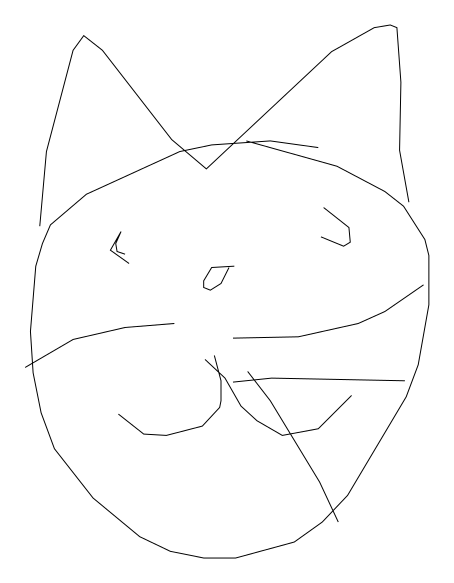

In [35]:
# Load data
data = np.load("sketchrnn_cat.npz", encoding='latin1', allow_pickle=True)
rand_num = random.randint(0,1000)
simp_npz = data['train'][rand_num]

draw_strokes(simp_npz, factor=0.75, save=False, svg_filename = './svg/cat1.svg')

👇 Plotting the other graphs is a bit more trick but we've already done all the steps juste before.

In [36]:
# Step 1
simp_npz = strokes_to_lines(simp_npz)
simp_npz = lines_to_strokes(simp_npz, delta=False)

# Step 2
simp_npz = to_big_strokes(simp_npz, max_len=1000) ##??
simp_npz = np.array(clean_strokes(simp_npz, factor=1)) ##??
simp_npz = to_normal_strokes(simp_npz) ##??

# Steps 3&4
lower = np.min(simp_npz[:, 0:2], axis=0)
upper = np.max(simp_npz[:, 0:2], axis=0)
scale = upper - lower
scale[scale == 0] = 1
simp_npz[:, 0:2] = (simp_npz[:, 0:2] - lower)*255 / scale

# Step 5
simp_npz[1:, 0:2] -= simp_npz[:-1, 0:2]

# Step 6 is unnecessary because the drawiing is already simplified

# Step 7
simp_npz = np.round(simp_npz).astype(float)

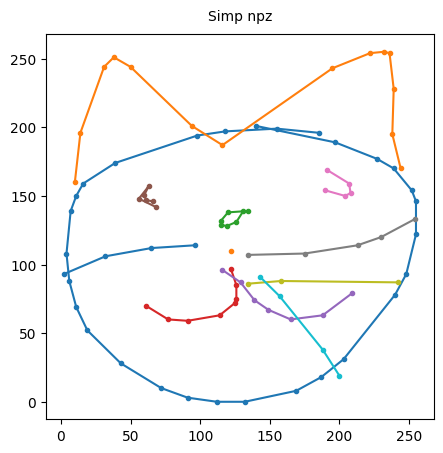

In [37]:
simp_npz = stroke_to_quickdraw(simp_npz, max_dim_size=255.0)
fig = plt.figure(figsize=(5,5))
axs = plt.subplot()
for i, stroke in enumerate(simp_npz): 
    x = list(stroke[0])
    y = list(stroke[1])
    # Uncomment the next line to reverse the y-axis
    y = list(map(lambda n : 255 - n, stroke[1]))
    axs.plot(x, y, '.-')
    #axs.axis('off')
    axs.set_title("Simp npz", fontsize=10, pad=10)

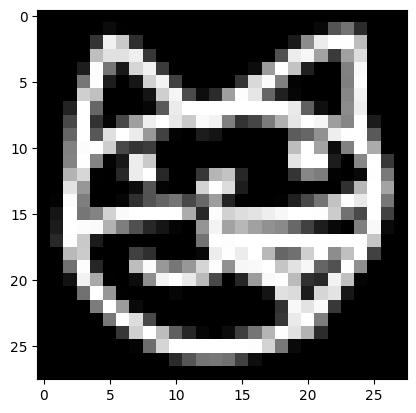

In [38]:
side = 28
image = np.array(vector_to_raster([simp_npz], side=side)).reshape(side,-1)
plt.imshow(image, cmap=plt.cm.gray);

## A useful class to handle QuickDraw data

Run the next cell to be able to experiment with the code below.

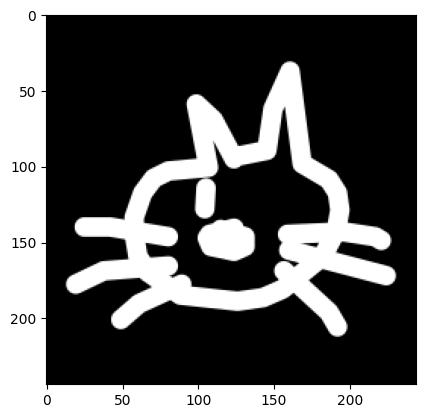

In [39]:
with open('./cat.ndjson', 'r') as cats_ndjson_file :
    cats_simp_ndjson_lines = cats_ndjson_file.readlines()
cat = SimplifiedDrawing.from_ndjson(cats_simp_ndjson_lines[0])
#cat.data
#cat.category
#cat.key_id
#cat.countrycode
#cat.strokes
#cat.n_strokes
#cat.stroke_length
#cat.total_points
#cat.draw()
cat.draw_bitmap(size = 244)
#cat.draw_vector()
#cat.draw_gif()
#cat.polyline_format
#cat.stroke_3_format
#cat.stroke_5_format

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class SimplifiedDrawing():
    """
    A class to represent a simplified drawing.
    ...

    Class attributes
    ----------
    
    Instance attributes
    ----------
    data : dict
        A dictionnary containing all the drawing information
    category : str
        The category of the drawing
    key_id : str
        The unique id of the drawing
    countrycode : str
        The country code from where the drawing was drawn 
    strokes : list
        A list of all strokes of the drawing
    n_strokes : int
        The number of strokes
    stroke_length : list
        A list containing the length of each strokes
    total_points : int
        Total number of points in the drawing
    polyline_format : list
        The Polyline format of the drawing
    stroke_3_format : numpy array
        The Stroke-3 format of the drawing
    stroke_5_format : numpy array
        The Stroke-5 format of the drawing
    
    Class methods
    ----------
    from_ndjson(cls, ndjson_line: str):
        Instantiate a new class object from a string in ndjson format.
    
    Instance methods
    ----------
    __init__(self, draw_dict: dict):
        Instantiate a new SimplifiedDrawing class object from a dictionnary.
    __repr__(self) :
        Built-in function: compute the "official" string representation of the instance.
    __str__(self) :
        Built-in function: compute the "informal" string representation of the instance.
    draw(self):
        Plot the drawing to visualize the strokes.
    draw_bitmap(self, size):
        Plot the drawing to visualize the bitmap image with a special size.
    draw_vector(self):
        Plot the drawing to visualize the vector image.
    draw_gif(self):
        Plot the drawing to visualize the vector image as a gif.
    
    Static methods
    ----------
    
    """
    
    def __init__(self, draw_dict: dict):
        """
        Instantiate a new class object from a dictionnary.
        ...
        
        Parameters
        ----------
        draw_dict: dict, mandatory
            A dictionnary containing all the drawing information.
            Must contain at least the following keys: 
            "word", str
                The category of the drawing
            "drawing", list
                A list of all strokes of the drawing
            "key_id", str
                The unique id of the drawing
            "countrycode",  str
                The country code from where the drawing was drawn 
        
        Returns
        -------
        None
        """
        self.data = {}
        for key in ["word", "drawing", "key_id", "countrycode"]:
            self.data[key] = draw_dict[key]
        self.category = self.data["word"]
        self.key_id = self.data["key_id"]
        self.countrycode = self.data["countrycode"]
        
        self.strokes = self.data["drawing"]
        self.n_strokes = len(self.strokes)
        self.stroke_lengths = [len(stroke[0]) for stroke in self.strokes]
        self.total_points = sum(self.stroke_lengths)
        
        self.polyline_format = raw_to_lines(self.strokes)
        self.stroke_3_format = lines_to_strokes(self.polyline_format, delta=True)
        self.stroke_5_format = to_big_strokes(self.stroke_3_format)
    
    @classmethod
    def from_ndjson(cls, ndjson_line: str):
        """
        Instantiate a new SimplifiedDrawing class object from a string in ndjson format.
        ...
        
        Parameters
        ----------
        ndjson: str, mandatory
            A string in ndjson format.
            Must contain at least the following keys: 
            "word", str
                The category of the drawing
            "drawing", list
                A list of all strokes of the drawing
            "key_id", str
                The unique id of the drawing
            "countrycode",  str
                The country code from where the drawing was drawn
        
        Returns
        -------
        drawing: SimplifiedDrawing class instance
            A new SimplifiedDrawing class instance
        """
        draw_dict = json.loads(ndjson_line)
        drawing = cls(draw_dict)
        return drawing
    
    def __repr__(self):
        """
        Built-in function: compute the "official" string representation of the instance.
        Can be called via the repr() or display() methods.
        ...
        
        Parameters
        -------
        
        Returns
        -------
        string: str
            A detailed string describing the class object.
        """
        string = f"Drawing({self.data})"
        return string
        
    def __str__(self):
        """
        Built-in function: compute the "informal" string representation of the instance.
        Can be called by the print() method.
        ...
        
        Parameters
        -------
        
        Returns
        -------
        string: str
            A simple string describing the class object.
        """
        string = f"{self.category.title()} - {self.n_strokes} strokes"
        return string
    
    def draw(self):
        """
        Plot the drawing to visualize the strokes.
        ...
        
        Parameters
        -------
        
        Returns
        -------
        None
        """
        fig, axs = plt.subplots(1, 1, figsize=(5,5))
        for i, stroke in enumerate(self.strokes): 
            x = list(stroke[0])
            y = list(stroke[1])
            # Uncomment the next line to reverse the y-axis
            y = list(map(lambda n : 255 - n, stroke[1]))
            axs.plot(x,y, '.-')
            axs.set_title(f"{self.category.title()} --> {self.n_strokes} strokes", fontsize=10, pad=10)
    
    def draw_bitmap(self, size):
        """
        Plot the drawing to visualize the bitmap image with a special size.
        ...
        
        Parameters
        -------
        size: int
            Size of the image from 0 to 256 (the original format)
        
        Returns
        -------
        None
        """
        image = np.array(vector_to_raster([self.strokes], side=size)).reshape(size,-1)
        plt.imshow(image, cmap=plt.cm.gray);
        
    def draw_vector(self):
        """
        Plot the drawing to visualize the vector image.
        ...
        
        Parameters
        -------
        
        Returns
        -------
        None
        """
        draw_strokes(self.stroke_3_format, factor=0.75, save=False)
    
    def draw_gif(self):
        """
        Plot the drawing to visualize the vector image as a gif.
        ...
        
        Parameters
        -------
        
        Returns
        -------
        None
        """
        draw_gif(self.stroke_3_format)

In [40]:
from rdp import rdp
import random

# Load data
with open('sample.json', 'r') as sample_file :
    raw_ndjson_lines = sample_file.readlines()

raw = json.loads(raw_ndjson_lines[0])

# Step 1
raw_lines = raw_to_lines(raw["drawing"])
raw_strokes_3 = lines_to_strokes(raw_lines, delta=False)
raw_strokes_3_before = lines_to_strokes(raw_lines, delta=True)

# Step 2
raw_strokes_3 = to_big_strokes(raw_strokes_3, max_len=5000) ##??
raw_strokes_3 = np.array(clean_strokes(raw_strokes_3, factor=1)) ##??
raw_strokes_3 = to_normal_strokes(raw_strokes_3) ##??

# Steps 3&4
lower = np.min(raw_strokes_3[:, 0:2], axis=0)
upper = np.max(raw_strokes_3[:, 0:2], axis=0)
scale = upper - lower
scale[scale == 0] = 1
raw_strokes_3[:, 0:2] = (raw_strokes_3[:, 0:2] - lower)*255 / scale

# Step 5
raw_strokes_3[1:, 0:2] -= raw_strokes_3[:-1, 0:2]

# Step 6
lines = strokes_to_lines(raw_strokes_3)
simp_lines = []
N = len(lines)
for i in range(N):
    line = rdp(lines[i], epsilon=2) 
    simp_lines.append(line) 

# Step 7
simp_strokes_3 = lines_to_strokes(simp_lines, delta=True)
simp_strokes_3 = np.round(simp_strokes_3).astype(float) ##??

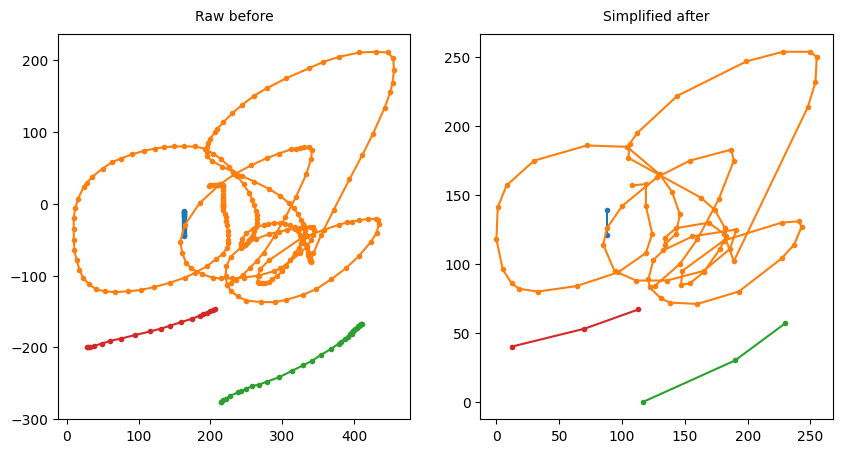

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

strokes = raw["drawing"]
for i, stroke in enumerate(strokes): 
    x = list(stroke[0])
    y = list(stroke[1])
    # Uncomment the next line to reverse the y-axis
    y = list(map(lambda n : 255 - n, stroke[1]))
    axs[0].plot(x,y, '.-')
    #axs[0].axis('off')
    axs[0].set_title("Raw before", fontsize=10, pad=10)


strokes = stroke_to_quickdraw(simp_strokes_3, max_dim_size=255)
for i, stroke in enumerate(strokes): 
    x = list(stroke[0])
    y = list(stroke[1])
    # Uncomment the next line to reverse the y-axis
    y = list(map(lambda n : 255 - n, stroke[1]))
    axs[1].plot(x, y, '.-')
    #axs[1].axis('off')
    axs[1].set_title("Simplified after", fontsize=10, pad=10)

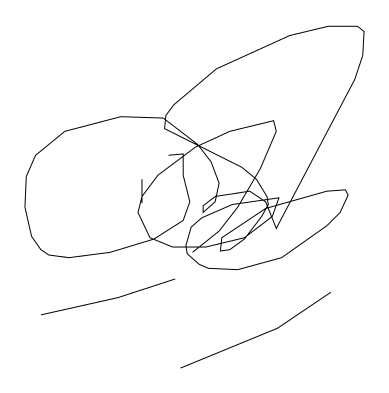

In [42]:
draw_strokes(simp_strokes_3, factor=0.75, save=False, svg_filename = './svg/cat1.svg')

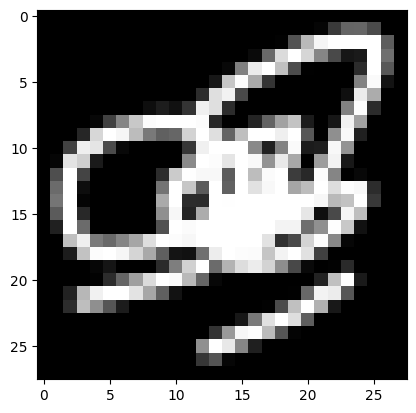

In [43]:
strokes = stroke_to_quickdraw(simp_strokes_3, max_dim_size=255)
image = np.array(vector_to_raster([strokes], side=28)).reshape(28,-1)
plt.imshow(image, cmap=plt.cm.gray);

In [44]:
image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   5,  58, 101, 102,  75,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   2,  83, 185, 245, 255, 255, 255, 255,
         93,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  10, 106, 219, 255, 214, 134,  74,  22,  26, 255,
        111,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   8, 128, 235, 255, 192,  76,   1,   0,   0,   0,  45, 255,
         88,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         23, 198, 252, 169,  52,   0,   0,   0,   0,   0,   0, 130, 250,
         19,   0],
       [  

In [45]:
import numpy as np
import os
import glob
from sklearn.model_selection import train_test_split

In [46]:
def load_data(root, vfold_ratio=0.2, max_items_per_class= 5000):
    
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    X = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load a subset of the data to memory 
    for idx, file in enumerate(all_files):
        print(file)
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        X = np.concatenate((X, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None

    #separate into training and testing and shuffle
    permutation = np.random.permutation(y.shape[0])
    X = X[permutation, :]
    y = y[permutation]

    vfold_size = int(X.shape[0]/100*(vfold_ratio*100))

    X_test = X[0:vfold_size, :]
    y_test = y[0:vfold_size]

    X_train = X[vfold_size:X.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return X_train, y_train, X_test, y_test, class_names

In [47]:
import numpy as np
import os
import glob
from sklearn.model_selection import train_test_split

def load_data(root, test_size=0.2, max_items_per_class= 5000):
    
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    X = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load a subset of the data to memory 
    for idx, file in enumerate(all_files):
        print(file)
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        X = np.concatenate((X, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None

    #shuffle (to be sure)
    permutation = np.random.permutation(y.shape[0])
    X = X[permutation, :]
    y = y[permutation]
    
    #separate into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True)

    return X_train, X_test, y_train, y_test, class_names

In [101]:
cats = np.load('./npy/full_numpy_bitmap_cat.npy')

In [49]:
X_train, X_test, y_train, y_test, class_names = load_data('./npy/', test_size=0.2, max_items_per_class=10)

./npy/full_numpy_bitmap_hat.npy
./npy/full_numpy_bitmap_cat.npy
./npy/full_numpy_bitmap_eye.npy
./npy/full_numpy_bitmap_car.npy
./npy/full_numpy_bitmap_guitar.npy
./npy/full_numpy_bitmap_frog.npy
./npy/full_numpy_bitmap_coffee cup.npy
./npy/full_numpy_bitmap_crown.npy
./npy/full_numpy_bitmap_bear.npy
./npy/full_numpy_bitmap_pig.npy


In [50]:
y_train.shape

(80,)

In [51]:
# Reshape and normalize
from tensorflow.keras.utils import to_categorical

image_size=28
num_classes = len(class_names)

X_train = X_train.reshape(X_train.shape[0], image_size, image_size, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], image_size, image_size, 1).astype('float32')

X_train /= 255.0
X_test /= 255.0

# Convert class vectors to class matrices, one hot encoded
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax')) 
# Train model
adam = Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [105]:
import tensorflow as tf

def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    if isinstance(value, type(tf.constant(0))): # if value ist tensor
        value = value.numpy() # get value of tensor
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a floast_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def serialize_array(array):
  array = tf.io.serialize_tensor(array)
  return array

In [106]:
cats_reshaped = cats.reshape(-1,28,28,1)

In [107]:
labels_cats = np.zeros((cats_reshaped.shape[0],1)).astype('int64')

In [108]:
labels_cats.shape

(123202, 1)

In [109]:
def parse_single_image(image, label):
  
    #define the dictionary -- the structure -- of our single example
    data = {
        'height' : _int64_feature(image.shape[0]),
        'width' : _int64_feature(image.shape[1]),
        'depth' : _int64_feature(image.shape[2]),
        'raw_image' : _bytes_feature(serialize_array(image)),
        'label' : _int64_feature(label)
    }
    #create an Example, wrapping the single features
    out = tf.train.Example(features=tf.train.Features(feature=data))

    return out

In [110]:
def write_images_to_tfr_short(images, labels, filename:str="images"):
    filename= filename+".tfrecords"
    writer = tf.io.TFRecordWriter(filename) #create a writer that'll store our data to disk
    count = 0

    for index in range(len(images)):

        #get the data we want to write
        current_image = images[index] 
        current_label = labels[index][0]

        out = parse_single_image(image=current_image, label=current_label)
        writer.write(out.SerializeToString())
        count += 1

    writer.close()
    print(f"Wrote {count} elements to TFRecord")
    return count

In [141]:
count = write_images_to_tfr_short(cats_reshaped, labels_cats, filename="2cats")

Wrote 123202 elements to TFRecord


In [142]:
def parse_tfr_element(element):
    #use the same structure as above; it's kinda an outline of the structure we now want to create
    data = {
      'height': tf.io.FixedLenFeature([], tf.int64),
      'width':tf.io.FixedLenFeature([], tf.int64),
      'label':tf.io.FixedLenFeature([], tf.int64),
      'raw_image' : tf.io.FixedLenFeature([], tf.string),
      'depth':tf.io.FixedLenFeature([], tf.int64),
    }


    content = tf.io.parse_single_example(element, data)

    height = content['height']
    width = content['width']
    depth = content['depth']
    label = content['label']
    raw_image = content['raw_image']


    #get our 'feature'-- our image -- and reshape it appropriately
    feature = tf.io.parse_tensor(raw_image, out_type=tf.uint8)
    feature = tf.reshape(feature, shape=[height,width,depth])
    return (feature, label)

In [143]:
def get_dataset(filename):
    #create the dataset
    dataset = tf.data.TFRecordDataset(filename)

    #pass every single feature through our mapping function
    dataset = dataset.map(parse_tfr_element)

    return dataset

In [144]:
cats_dataset = get_dataset("cats.tfrecords")

In [145]:
for sample in cats_dataset.take(1):
    print(sample[0].shape)
    print(sample[1].shape)

(28, 28, 1)
()


In [146]:
def get_dataset_multi(tfr_dir: str = "/content/", pattern: str = "*.tfrecords"):
    files = glob.glob(os.path.join(tfr_dir, pattern), recursive=False)
    print(files)

    #create the dataset
    dataset = tf.data.TFRecordDataset(files)

    #pass every single feature through our mapping function
    dataset = dataset.map(
        parse_tfr_element
    )

    return dataset

In [147]:
cats_dataset = get_dataset_multi(tfr_dir='.', pattern="*cats.tfrecords")

['./2cats.tfrecords', './cats.tfrecords']


In [148]:
for sample in cats_dataset.take(2):
    print(sample[0].shape)
    print(sample[1].shape)

(28, 28, 1)
()
(28, 28, 1)
()


In [150]:
cats_dataset = cats_dataset.batch(32)
cats_dataset = cats_dataset.map(lambda x, y:(tf.cast(x, tf.float32)/255.0, y))

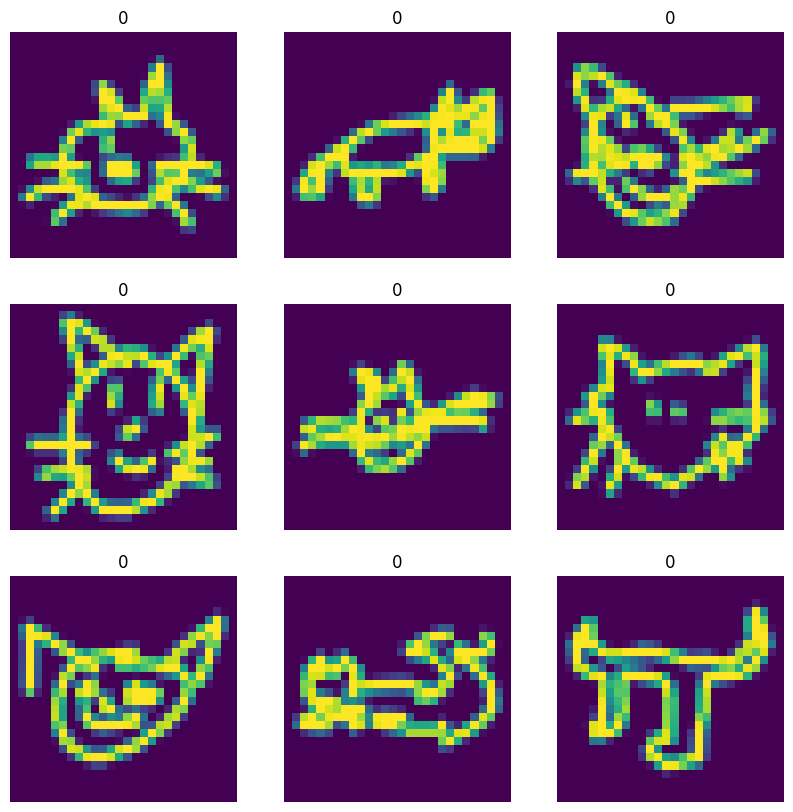

In [153]:
plt.figure(figsize=(10, 10))
for images, labels in cats_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(int(labels[i]))
        plt.axis("off")

In [168]:
def load_data(root, test_size=0.2, max_items_per_class= 5000):
    
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    X = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load a subset of the data to memory 
    for idx, file in enumerate(all_files):
        print(file)
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        X = np.concatenate((X, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None

    #shuffle (to be sure)
    permutation = np.random.permutation(y.shape[0])
    X = X[permutation, :]
    y = y[permutation]
    
    #separate into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True)

    return X_train.astype(int), X_test.astype(int), y_train.astype(int), y_test.astype(int), class_names

In [169]:
X_train, X_test, y_train, y_test, class_names = load_data('./npy/', test_size=0.2, max_items_per_class=100000)

./npy/full_numpy_bitmap_hat.npy
./npy/full_numpy_bitmap_cat.npy
./npy/full_numpy_bitmap_eye.npy
./npy/full_numpy_bitmap_car.npy
./npy/full_numpy_bitmap_guitar.npy
./npy/full_numpy_bitmap_frog.npy
./npy/full_numpy_bitmap_coffee cup.npy
./npy/full_numpy_bitmap_crown.npy
./npy/full_numpy_bitmap_bear.npy
./npy/full_numpy_bitmap_pig.npy


In [170]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [171]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [172]:
X_train.shape

(800000, 28, 28, 1)

In [173]:
count = write_images_to_tfr_short(X_train, y_train, filename="train")

Wrote 800000 elements to TFRecord


In [174]:
count = write_images_to_tfr_short(X_test, y_test, filename="test")

Wrote 200000 elements to TFRecord


In [182]:
def parse_tfr_element(element):
    #use the same structure as above; it's kinda an outline of the structure we now want to create
    data = {
      'height': tf.io.FixedLenFeature([], tf.int64),
      'width':tf.io.FixedLenFeature([], tf.int64),
      'label':tf.io.FixedLenFeature([], tf.int64),
      'raw_image' : tf.io.FixedLenFeature([], tf.string),
      'depth':tf.io.FixedLenFeature([], tf.int64),
    }


    content = tf.io.parse_single_example(element, data)

    height = content['height']
    width = content['width']
    depth = content['depth']
    label = content['label']
    raw_image = content['raw_image']


    #get our 'feature'-- our image -- and reshape it appropriately
    feature = tf.io.parse_tensor(raw_image, out_type=tf.int64)
    feature = tf.reshape(feature, shape=[height,width,depth])
    return (feature, label)

In [183]:
def get_dataset_multi(tfr_dir: str = "/content/", pattern: str = "*.tfrecords"):
    files = glob.glob(os.path.join(tfr_dir, pattern), recursive=False)
    print(files)

    #create the dataset
    dataset = tf.data.TFRecordDataset(files)

    #pass every single feature through our mapping function
    dataset = dataset.map(parse_tfr_element)

    return dataset

In [184]:
dataset = get_dataset_multi(tfr_dir='.', pattern="*train.tfrecords")
dataset = dataset.batch(32)
dataset = dataset.map(lambda x, y:(tf.cast(x, tf.float32)/255.0, y))

['./train.tfrecords']


In [185]:
for sample in dataset.take(2):
    print(sample[0].shape)
    print(sample[1].shape)

(32, 28, 28, 1)
(32,)
(32, 28, 28, 1)
(32,)


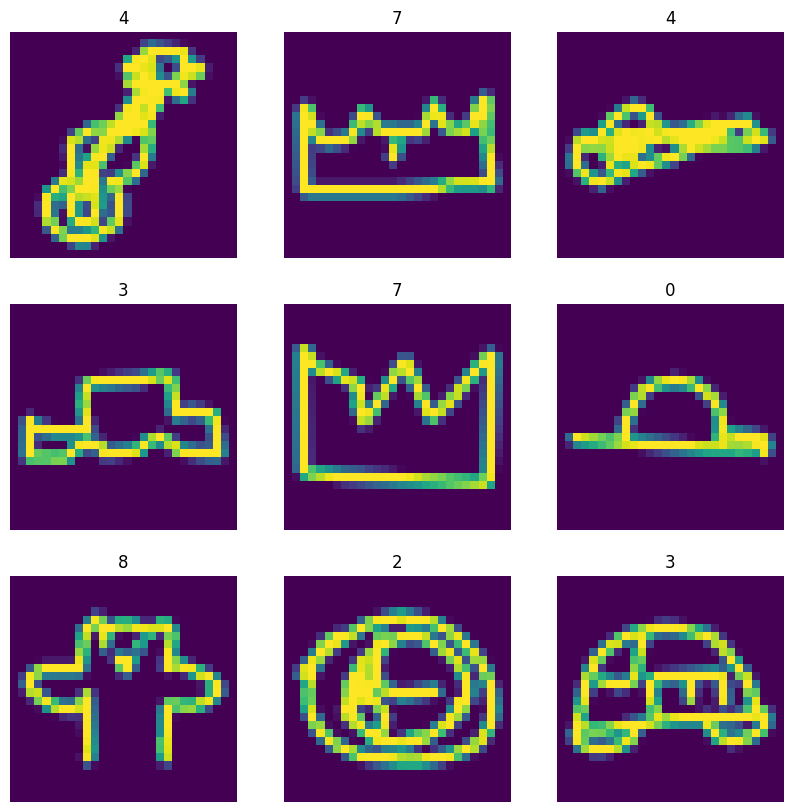

In [186]:
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(int(labels[i]))
        plt.axis("off")

In [192]:
import tqdm

def write_images_to_tfr_long(images, labels, filename:str="large_images", max_files:int=10, out_dir:str="/content/"):

    #determine the number of shards (single TFRecord files) we need:
    splits = (len(images)//max_files) + 1 #determine how many tfr shards are needed
    if len(images)%max_files == 0:
        splits-=1
    print(f"\nUsing {splits} shard(s) for {len(images)} files, with up to {max_files} samples per shard")

    file_count = 0

    for i in tqdm.tqdm(range(splits)):
        current_shard_name = "{}{}_{}{}.tfrecords".format(out_dir, i+1, splits, filename)
        writer = tf.io.TFRecordWriter(current_shard_name)

        current_shard_count = 0
        while current_shard_count < max_files: #as long as our shard is not full
            #get the index of the file that we want to parse now
            index = i*max_files+current_shard_count
            if index == len(images): #when we have consumed the whole data, preempt generation
                break

            current_image = images[index]
            current_label = labels[index][0]

            #create the required Example representation
            out = parse_single_image(image=current_image, label=current_label)

            writer.write(out.SerializeToString())
            current_shard_count+=1
            file_count += 1

        writer.close()
    print(f"\nWrote {file_count} elements to TFRecord")
    return file_count

In [198]:
write_images_to_tfr_long(X_train, y_train, filename="train", max_files=80000, out_dir="./")


Using 10 shard(s) for 800000 files, with up to 80000 samples per shard


100%|███████████████████████████████████████████| 10/10 [04:07<00:00, 24.73s/it]


Wrote 800000 elements to TFRecord


800000

In [199]:
write_images_to_tfr_long(X_test, y_test, filename="test", max_files=20000, out_dir="./")


Using 10 shard(s) for 200000 files, with up to 20000 samples per shard


100%|███████████████████████████████████████████| 10/10 [01:01<00:00,  6.14s/it]


Wrote 200000 elements to TFRecord


200000

In [195]:
dataset = get_dataset_multi(tfr_dir='.', pattern="*_10test.tfrecords")
dataset = dataset.batch(32)
dataset = dataset.map(lambda x, y:(tf.cast(x, tf.float32)/255.0, y))

['./2_10test.tfrecords', './9_10test.tfrecords', './6_10test.tfrecords', './3_10test.tfrecords', './8_10test.tfrecords', './7_10test.tfrecords', './10_10test.tfrecords', './4_10test.tfrecords', './1_10test.tfrecords', './5_10test.tfrecords']


In [196]:
for sample in dataset.take(2):
    print(sample[0].shape)
    print(sample[1].shape)

(32, 28, 28, 1)
(32,)
(32, 28, 28, 1)
(32,)


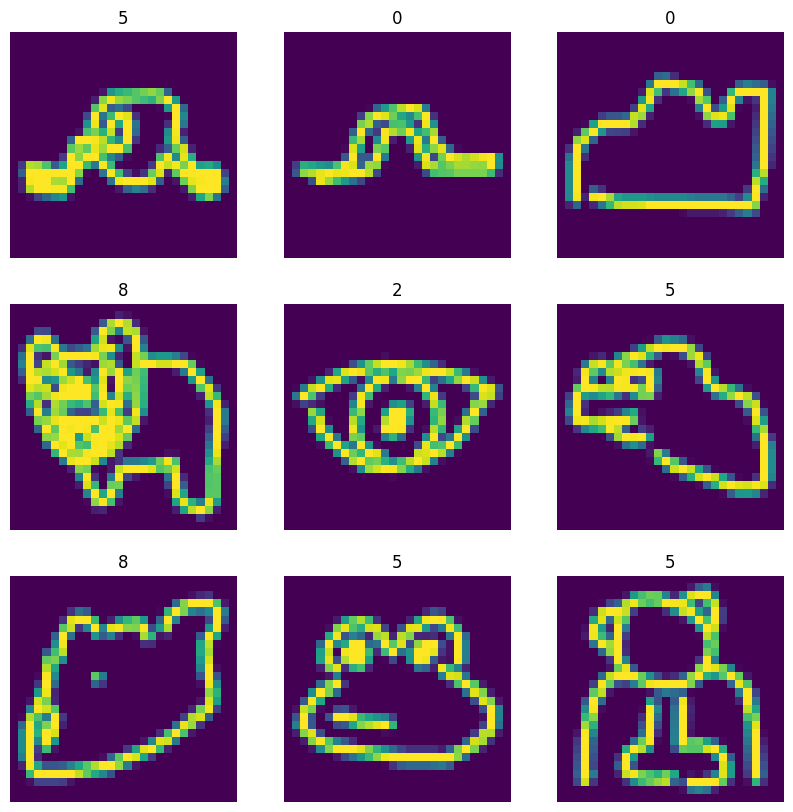

In [197]:
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(int(labels[i]))
        plt.axis("off")

In [21]:
import matplotlib.pyplot as plt
import glob
import os

In [14]:
def load_shard(root, test_size=0.2, max_items_per_class= 5000):
    
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    X = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load a subset of the data to memory 
    for idx, file in enumerate(all_files):
        print(file)
        data = np.load(file)
        data = data[shard*max_items_per_class: (shard+1)*max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        X = np.concatenate((X, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None

    #shuffle (to be sure)
    permutation = np.random.permutation(y.shape[0])
    X = X[permutation, :]
    y = y[permutation]
    
    #separate into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True)

    return X_train.astype(int), X_test.astype(int), y_train.astype(int), y_test.astype(int), class_names

In [15]:
import tensorflow as tf

def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    if isinstance(value, type(tf.constant(0))): # if value ist tensor
        value = value.numpy() # get value of tensor
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a floast_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def serialize_array(array):
  array = tf.io.serialize_tensor(array)
  return array

In [16]:
def parse_single_image(image, label):
  
    #define the dictionary -- the structure -- of our single example
    data = {
        'height' : _int64_feature(image.shape[0]),
        'width' : _int64_feature(image.shape[1]),
        'depth' : _int64_feature(image.shape[2]),
        'raw_image' : _bytes_feature(serialize_array(image)),
        'label' : _int64_feature(label)
    }
    #create an Example, wrapping the single features
    out = tf.train.Example(features=tf.train.Features(feature=data))

    return out

In [17]:
def write_images_to_tfr_short(images, labels, filename:str="images"):
    filename= filename+".tfrecords"
    writer = tf.io.TFRecordWriter(filename) #create a writer that'll store our data to disk
    count = 0

    for index in range(len(images)):

        #get the data we want to write
        current_image = images[index] 
        current_label = labels[index][0]

        out = parse_single_image(image=current_image, label=current_label)
        writer.write(out.SerializeToString())
        count += 1

    writer.close()
    print(f"Wrote {count} elements to TFRecord")
    return count

In [203]:
for shard in range(10):
    print(shard)
    X_train, X_test, y_train, y_test, class_names = load_shard('./npy/', test_size=0.2, max_items_per_class=10000)
    X_train = X_train.reshape(-1,28,28,1)
    X_test = X_test.reshape(-1,28,28,1)  
    y_train = y_train.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    write_images_to_tfr_short(X_train, y_train, filename=f"shard_{shard}_train")
    write_images_to_tfr_short(X_test, y_test, filename=f"shard_{shard}_test")

0
./npy/full_numpy_bitmap_hat.npy
./npy/full_numpy_bitmap_cat.npy
./npy/full_numpy_bitmap_eye.npy
./npy/full_numpy_bitmap_car.npy
./npy/full_numpy_bitmap_guitar.npy
./npy/full_numpy_bitmap_frog.npy
./npy/full_numpy_bitmap_coffee cup.npy
./npy/full_numpy_bitmap_crown.npy
./npy/full_numpy_bitmap_bear.npy
./npy/full_numpy_bitmap_pig.npy
Wrote 80000 elements to TFRecord
Wrote 20000 elements to TFRecord
1
./npy/full_numpy_bitmap_hat.npy
./npy/full_numpy_bitmap_cat.npy
./npy/full_numpy_bitmap_eye.npy
./npy/full_numpy_bitmap_car.npy
./npy/full_numpy_bitmap_guitar.npy
./npy/full_numpy_bitmap_frog.npy
./npy/full_numpy_bitmap_coffee cup.npy
./npy/full_numpy_bitmap_crown.npy
./npy/full_numpy_bitmap_bear.npy
./npy/full_numpy_bitmap_pig.npy
Wrote 80000 elements to TFRecord
Wrote 20000 elements to TFRecord
2
./npy/full_numpy_bitmap_hat.npy
./npy/full_numpy_bitmap_cat.npy
./npy/full_numpy_bitmap_eye.npy
./npy/full_numpy_bitmap_car.npy
./npy/full_numpy_bitmap_guitar.npy
./npy/full_numpy_bitmap_frog.np

In [18]:
def parse_tfr_element(element):
    #use the same structure as above; it's kinda an outline of the structure we now want to create
    data = {
      'height': tf.io.FixedLenFeature([], tf.int64),
      'width':tf.io.FixedLenFeature([], tf.int64),
      'label':tf.io.FixedLenFeature([], tf.int64),
      'raw_image' : tf.io.FixedLenFeature([], tf.string),
      'depth':tf.io.FixedLenFeature([], tf.int64),
    }


    content = tf.io.parse_single_example(element, data)

    height = content['height']
    width = content['width']
    depth = content['depth']
    label = content['label']
    raw_image = content['raw_image']


    #get our 'feature'-- our image -- and reshape it appropriately
    feature = tf.io.parse_tensor(raw_image, out_type=tf.int64)
    feature = tf.reshape(feature, shape=[height,width,depth])
    return (feature, label)

In [22]:
def get_dataset_multi(tfr_dir: str = "/content/", pattern: str = "*.tfrecords"):
    files = glob.glob(os.path.join(tfr_dir, pattern), recursive=False)
    print(files)

    #create the dataset
    dataset = tf.data.TFRecordDataset(files)

    #pass every single feature through our mapping function
    dataset = dataset.map(parse_tfr_element)

    return dataset

In [49]:
dataset = get_dataset_multi(tfr_dir='.', pattern="*0_train.tfrecords")
dataset = dataset.batch(32)
dataset = dataset.map(lambda x, y:(tf.cast(x, tf.float32)/255.0, y))
for sample in dataset.take(2):
    print(sample[0].shape)
    print(sample[1].shape)

['./shard_0_train.tfrecords']
(32, 28, 28, 1)
(32,)
(32, 28, 28, 1)
(32,)


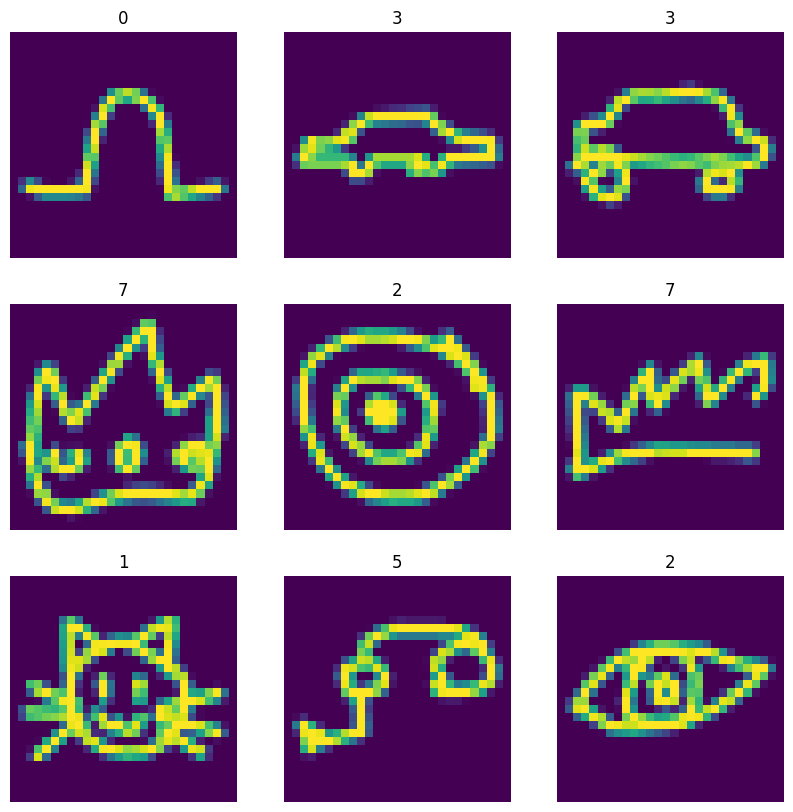

In [35]:
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(int(labels[i]))
        plt.axis("off")

In [25]:
class_names

NameError: name 'class_names' is not defined

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=(28,28,1), 
                        activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) 
# Train model
adam = Adam()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 3, 3, 64)        

In [57]:
dataset = get_dataset_multi(tfr_dir='.', pattern="*0_train.tfrecords")
dataset = dataset.batch(32)
dataset = dataset.map(lambda x, y:(tf.cast(x, tf.float32)/255.0, y))
#for sample in dataset.take(2):
#    print(sample[0].shape)
#    print(sample[1].shape)

['./shard_0_train.tfrecords']


In [ ]:
dataset1 = get_dataset_multi(tfr_dir='.', pattern="*0_train.tfrecords")
dataset = dataset.batch(32)
dataset = dataset.map(lambda x, y:(tf.cast(x, tf.float32)/255.0, y))

In [58]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [59]:
history = model.fit(
    dataset,
    batch_size=32,
    verbose=1,
    epochs=1,
    )

2500/2500 [==============================] - 12s 5ms/step - loss: 0.7204 - accuracy: 0.7621
